# Project 1 - IE5202
### Author : Gabriel Azevedo Ferreira

Importing main packages and loading data 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import sklearn as sk


from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

data = pd.read_csv("P1TrainingData.csv",header=None)

target = data[[0]]
features = data[data.columns[1:42]]

numerical_features = features[features.columns[0:39]]
data.head()

0       1   2    3   4    5      6          7    8          9  ...   32  \
0   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...    0   
1   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...    0   
2   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...    0   
3   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...    3   
4   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...    0   

   33  34  35   36  37  38  39   40   41  
0   0   0  65  166   2   0  24  WED  SAT  
1   0   0  10  132   1   0  24  THU  FRI  
2   0   0  14  133   2   0  24  FRI  SAT  
3   7  -3  62  131   1   0  24  FRI  MON  
4   1   0  58  142   5   0  24  MON  WED  

[5 rows x 42 columns]

In [41]:
#preprocessing (converting weekdays to numbers)
data.loc[data.loc[:,40] == 'FRI',40] = 6
data.loc[data.loc[:,40] == 'THU',40] = 5
data.loc[data.loc[:,40] == 'WED',40] = 4
data.loc[data.loc[:,40] == 'TUE',40] = 3
data.loc[data.loc[:,40] == 'MON',40] = 2
data.loc[data.loc[:,40] == 'SUN',40] = 1
data.loc[data.loc[:,40] == 'SAT',40] = 7

data.loc[data.loc[:,41] == 'FRI',41] = 6
data.loc[data.loc[:,41] == 'THU',41] = 5
data.loc[data.loc[:,41] == 'WED',41] = 4
data.loc[data.loc[:,41] == 'TUE',41] = 3
data.loc[data.loc[:,41] == 'MON',41] = 2
data.loc[data.loc[:,41] == 'SUN',41] = 1
data.loc[data.loc[:,41] == 'SAT',41] = 7
data.head()

0       1   2    3   4    5      6          7    8          9  ...  32  33  \
0   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...   0   0   
1   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...   0   0   
2   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...   0   0   
3   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...   3   7   
4   0  634995   0  463   1  0.0  806.0  11.291045  1.0  70.495138 ...   0   1   

   34  35   36  37  38  39  40  41  
0   0  65  166   2   0  24   4   7  
1   0  10  132   1   0  24   5   6  
2   0  14  133   2   0  24   6   7  
3  -3  62  131   1   0  24   6   2  
4   0  58  142   5   0  24   2   4  

[5 rows x 42 columns]

In [42]:
#configuring print options
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

### Visualizing data

we perform PCA to visualize the data in low dimension

[ 0.45041  0.10444  0.06395  0.04774  0.04577  0.04292  0.03276  0.02667
  0.0261   0.02522]


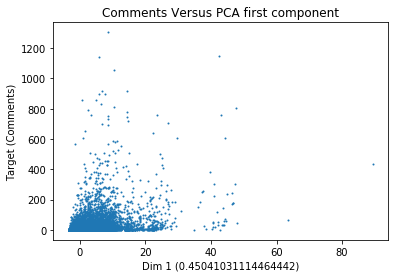

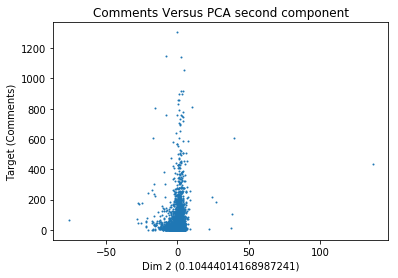

In [43]:
#PCA
pca = sk.decomposition.PCA(n_components=10)
num_var_reduced = sk.preprocessing.scale(numerical_features)
new_matrix = pca.fit_transform(num_var_reduced)
print pca.explained_variance_ratio_

plt.title("Comments Versus PCA first component")
plt.xlabel("Dim 1 (" + `pca.explained_variance_ratio_[0]` + ")")
plt.ylabel("Target (Comments)")
plt.scatter(new_matrix[:,0],target,s = 1)
#plt.savefig('images/pca1.eps', format='eps', dpi=1000)
plt.savefig('images/pca1.png', dpi=1000)
plt.show()

plt.title("Comments Versus PCA second component")
plt.xlabel("Dim 2 (" + `pca.explained_variance_ratio_[1]` + ")")
plt.ylabel("Target (Comments)")
plt.scatter(new_matrix[:,2],target,s = 1)
#plt.savefig('images/pca2.eps', format='eps', dpi=1000)
plt.savefig('images/pca2.png', dpi=1000)
plt.show()

### Plotting the correlations matrix
We notice that columns from 5 to 29 are very correlated, which is due to the fact that they are transformations of essential features (derivated features).

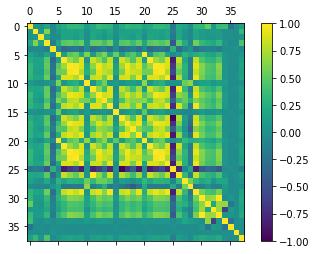

In [44]:
correlations = data[data.columns[0:38]].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.savefig('images/corrMatrix.png', dpi=1000)
plt.show()

Visualizing correlations in the chosen ones with a scatter plot

In [45]:
from pandas.tools.plotting import scatter_matrix

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


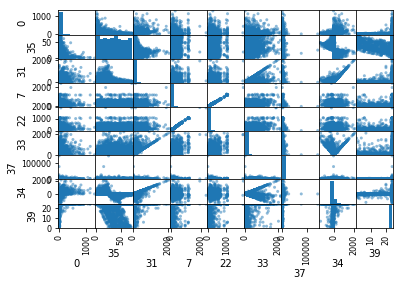

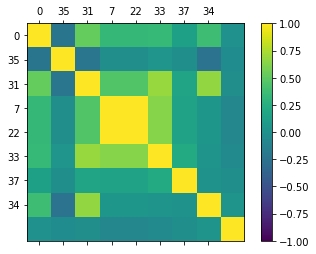

In [46]:
decided_df = pd.concat(
[
    target,
    data[[35,31,7,22,33,37,34,39]]
],axis = 1
)
scatter_matrix(decided_df)
plt.savefig('images/scatterMatrix.png', dpi=1200)
plt.show()

correlations = decided_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = [0,35,31,7,22,33,37,34,39]
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.savefig('images/reducedCorrMatrix.png', dpi=1000)
plt.show()

### Correlation between target and features
Ps: not by coincidence, the varibles most correleted to the target are also features produced the best regression!

In [47]:
correlation_array = np.corrcoef(
    np.transpose(data[data.columns[0:38]])
    )[0,:]
columns_sorted_by_correlation = np.argsort(abs(correlation_array))

print columns_sorted_by_correlation
print correlation_array[columns_sorted_by_correlation]

[36 15 28  2  1 32  4 10 37  5 27 20  3 26 25 11 35 21 16  6 18 24 19 14  9
 29 13 17 23  8 30 22  7 33 12 34 31  0]
[-0.00062  0.0119  -0.0195   0.02298  0.05892  0.07209 -0.07367  0.10334
  0.13929  0.15694  0.16249  0.1643   0.17733  0.21387 -0.21405  0.21775
 -0.22196  0.22591  0.22988  0.23143  0.27643  0.29522  0.29679  0.2972
  0.30023  0.3088   0.30946  0.31787  0.32437  0.32537  0.32688  0.33399
  0.33499  0.34174  0.34483  0.37845  0.5287   1.     ]


### Step 1 : Simple regression model

Regression with the variables with most correlation




#### One single variable

39
Coefficients:  [[ 0.23267]] intercept:  [ 1.79294]
Mean squared error: 1259.63
r^2 score:  0.00015836690565


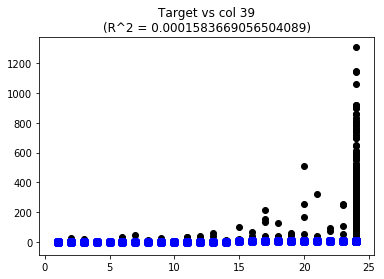

34
Coefficients:  [[ 0.1426]] intercept:  [ 6.96113]
Mean squared error: 1079.39
r^2 score:  0.143226521504


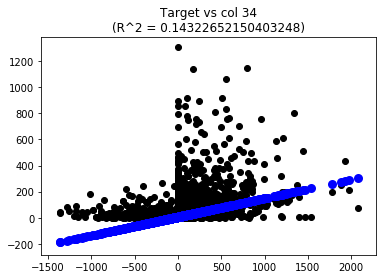

31
Coefficients:  [[ 0.24332]] intercept:  [ 1.92445]
Mean squared error: 907.68
r^2 score:  0.279519742419


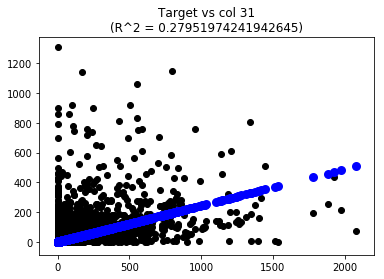

0
Coefficients:  [[ 1.]] intercept:  [-0.]
Mean squared error: 0.00
r^2 score:  1.0


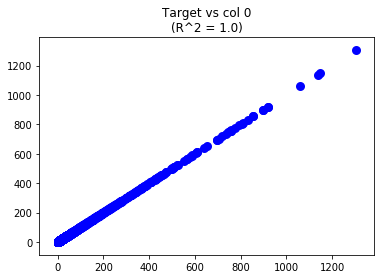

In [51]:
#selecting columns
regression_on_feature = []
for i,col in enumerate([39, 34, 31,  0]):
        regression_on_feature.append(sk.linear_model.LinearRegression())
        regression_on_feature[i].fit(
                                 data[[col]]
                                ,target)
        #prediction
        pred = regression_on_feature[i].predict(data[[col]])
        
        # The coefficients
        print `col`
        print'Coefficients: ', regression_on_feature[i].coef_,
        print'intercept: ',regression_on_feature[i].intercept_
        print("Mean squared error: %.2f" % mean_squared_error(target, pred))
        print'r^2 score: ', regression_on_feature[i].score(data[[col]],target)
        
        r2score = regression_on_feature[i].score(data[[col]],target)
        
        # Plot outputs
        plt.title('Target vs col ' + `col` + '\n(R^2 = ' + `r2score`+ ')')
        plt.scatter(data[[col]], target,  color='black')
        plt.scatter(data[[col]], pred  ,  color='blue', linewidth=3)
        plt.savefig('images/singleVarRegr'+`col`+'.png', dpi=1000)
        plt.show()

No cross validation was done because the results were nnot satisfying even in the training set.

#### One variable polynomial
polynomial with one single variable

39	Coefficients:  [[-2.56896  0.99687 -0.1316   0.00731 -0.00014 -0.00013]] intercept:  [ 2.36507]
Mean squared error: 1259.05
r^2 score:  0.000621218405162


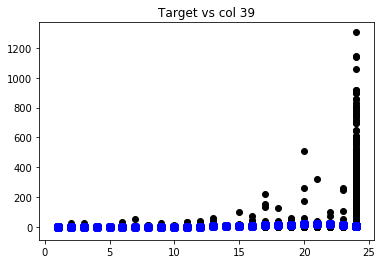

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


34	Coefficients:  [[ 0.13223  0.00035 -0.      -0.       0.       0.00082]] intercept:  [ 3.3618]
Mean squared error: 925.86
r^2 score:  0.265092755413


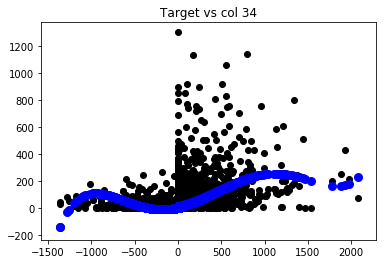

31	Coefficients:  [[ 0.29703  0.00001 -0.      -0.       0.      -0.00006]] intercept:  [ 1.18609]
Mean squared error: 886.53
r^2 score:  0.296311413123


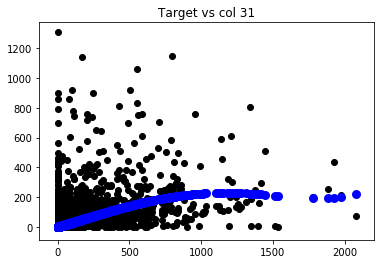

0	Coefficients:  [[ 1. -0.  0. -0.  0. -0.]] intercept:  [-0.]
Mean squared error: 0.00
r^2 score:  1.0


In [97]:
#selecting columns
regression_on_feature = []
for i,col in enumerate([39, 34, 31, 0]):
        exponentaial_transformation = np.exp(data[[col]])
        exponentaial_transformation[exponentaial_transformation > 1.0e+04] = 1.0e+04 #truncation
        polynomio_matrix = pd.concat(
                                        [
                                            data[[col]],
                                            data[[col]]*data[[col]],
                                            data[[col]]*data[[col]]*data[[col]],
                                            data[[col]]*data[[col]]*data[[col]]*data[[col]],
                                            data[[col]]*data[[col]]*data[[col]]*data[[col]]*data[[col]],
                                            exponentaial_transformation
                                        ]
                                        ,axis=1
                                    )
        
        
        regression_on_feature.append(sk.linear_model.LinearRegression())
        regression_on_feature[i].fit(
                                 polynomio_matrix
                                ,target)
        #prediction
        pred = regression_on_feature[i].predict(polynomio_matrix)
        
        # The coefficients
        print `col` + '\t',
        print'Coefficients: ', regression_on_feature[i].coef_,
        print'intercept: ',regression_on_feature[i].intercept_
        print("Mean squared error: %.2f" % mean_squared_error(target, pred))
        print'r^2 score: ', regression_on_feature[i].score(polynomio_matrix,target)
        
        # Plot outputs
        plt.title('Target vs col ' + `col`)
        plt.scatter(data[[col]], target,  color='black')
        plt.scatter(data[[col]], pred  ,  color='blue', linewidth=3)

        plt.show()

## 6 variables simple regression

### Feature Selection

We used two methods too select the potentially best 6 features

#### Method 1
We first used the variables with greatest correlation coefficient with the target.

0	Coefficients:  [[-0.74331899  0.71197723 -0.03732684  0.13720786  0.00645164  0.24285697]] intercept:  [ 0.28914462]
Mean squared error: 876.36
r^2 score:  0.304380777618


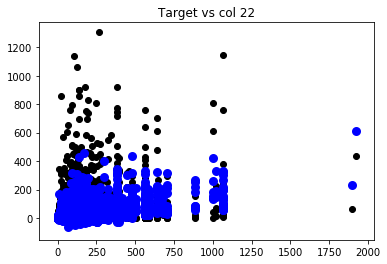

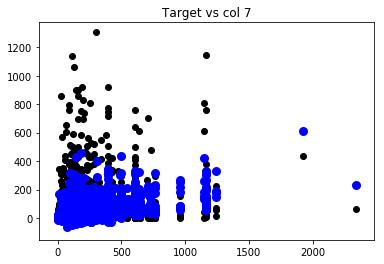

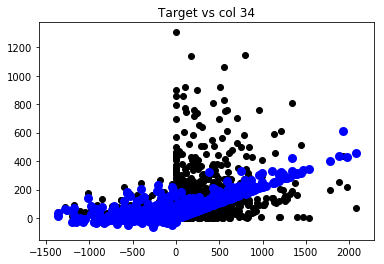

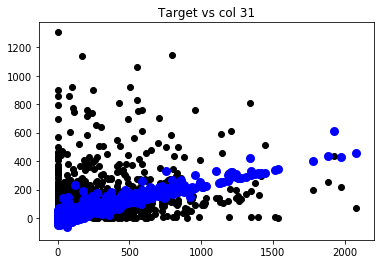

In [27]:
#selecting columns
selected_features = features[[22, 7, 33, 12, 34, 31]]
        
regression_on_feature.append(sk.linear_model.LinearRegression())
regression_on_feature[i].fit(
                         selected_features
                        ,target)
#prediction
pred = regression_on_feature[i].predict(selected_features)

# The coefficients
print `col` + '\t',
print'Coefficients: ', regression_on_feature[i].coef_,
print'intercept: ',regression_on_feature[i].intercept_
print("Mean squared error: %.2f" % mean_squared_error(target, pred))
print'r^2 score: ', regression_on_feature[i].score(selected_features,target)


for col in [22, 7, 33, 12, 34, 31]:
    # Plot outputs
    plt.title('Target vs col ' + `col`)
    plt.scatter(data[[col]], target,  color='black')
    plt.scatter(data[[col]], pred  ,  color='blue', linewidth=3)

    plt.show()

Then we performed a mix of "brute force algorithm" and greedy algorithm to selected the best 6 variables:
- We found, by brute force, the best regressions with 4 variables (the ones with the least $r^2$)
- We took from it only the 3 most frequent variables (the ones that appeared most often on the 10 better regressions)
- we found the best 6 variables regression where the 3 previously selected variables were present

In [28]:
#selecting best 4 features

combination_of_cols = []
r2 = []

t = 0

for col3 in range(1,39-3):
    for col4 in range(col3+1,39-2):
        for col5 in range(col4+1,39-1):
            for col6 in range(col5+1,39):
                selected_features = features[[col3,col4,col5,col6]]
                regression_on_feature.append(sk.linear_model.LinearRegression())
                regression_on_feature[i].fit(
                                         selected_features
                                        ,target)
                #prediction
                pred = regression_on_feature[i].predict(selected_features)
                r2_for_this_prediction = regression_on_feature[i].score(selected_features,target)
                
                combination_of_cols.append([col3,col4,col5,col6])
                r2.append(r2_for_this_prediction)
                
                if t!=col3:
                    t = col3
                    print t
                
                if r2_for_this_prediction > .3:
                    print [col3,col4,col5,col6]
                    print'Coefficients: ', regression_on_feature[i].coef_,
                    print'intercept: ',regression_on_feature[i].intercept_
                    print("Mean squared error: %.2f" % mean_squared_error(target, pred))
                    print'r^2 score: ', regression_on_feature[i].score(selected_features,target)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [30]:
# taking the best 3 of those 4
arg_col_max_r2 = np.argmax(r2)

print combination_of_cols[arg_col_max_r2]

print np.argsort(r2)[(len(r2)-10):len(r2)]

print combination_of_cols[42301]
print combination_of_cols[42296]
print combination_of_cols[42320]
print combination_of_cols[42305]
print combination_of_cols[42269]
print combination_of_cols[46361]
print combination_of_cols[67776]
print combination_of_cols[67800]
print combination_of_cols[71946]

#35 31 7 32 ao 4

[7, 31, 33, 35]
[71946 67800 67785 67776 46361 42269 42305 42296 42320 42301]
[7, 31, 33, 35]
[7, 31, 32, 35]
[7, 32, 34, 35]
[7, 31, 34, 35]
[7, 30, 31, 35]
[8, 31, 33, 35]
[17, 31, 32, 35]
[17, 32, 34, 35]
[22, 31, 33, 35]


In [52]:
#selecting best 4 features

combination_of_cols2 = []
r22 = []

t = 0

for col1 in range(1,39-2):
    for col2 in range(col1+1,39-1):
        for col3 in range(col2+1,39):
                selected_features = features[[35,31,7,col1,col2,col3]]
                regression_on_feature.append(sk.linear_model.LinearRegression())
                regression_on_feature[i].fit(
                                         selected_features
                                        ,target)
                #prediction
                pred = regression_on_feature[i].predict(selected_features)
                r2_for_this_prediction = regression_on_feature[i].score(selected_features,target)
                
                combination_of_cols2.append([col1,col2,col3])
                r22.append(r2_for_this_prediction)
                
#                if t!=col1:
#                    t = col1
#                    print t
#                
#                if r2_for_this_prediction > .315:
#                    print [col1,col2,col3]
#                    print'Coefficients: ', regression_on_feature[i].coef_,
#                    print'intercept: ',regression_on_feature[i].intercept_
#                    print("Mean squared error: %.2f" % mean_squared_error(target, pred))
#                    print'r^2 score: ', regression_on_feature[i].score(selected_features,target)                    
                    

In [53]:
print combination_of_cols2[np.argmax(r22)]
print np.max(r22)

[22, 33, 37]
0.316525339173


#### The selected features are

35,31,7,22,33,37

In [63]:
selected_features = features[[35,31,7,22,33,37]]

- plotar gradico com unidirecao
- coeficientes

#### Cross validation

In [64]:
best_6_reg = sk.linear_model.LinearRegression()
scores = sk.model_selection.cross_val_score(best_6_reg,selected_features,target,cv = 10)
print scores
print scores.mean()
best_6_reg.fit(selected_features,target)
print best_6_reg.score(selected_features,target)

[ 0.42188  0.32781  0.27241  0.3075   0.36286  0.26097  0.38099  0.08769
  0.34572  0.30132]
0.306914155465
0.316525339173


Plotting the regression results on one single variable

0.316525339173


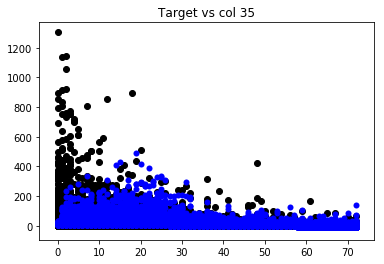

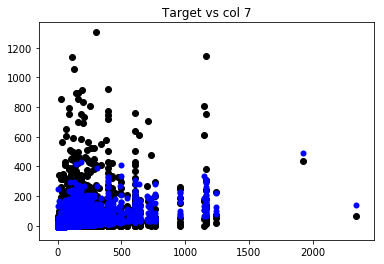

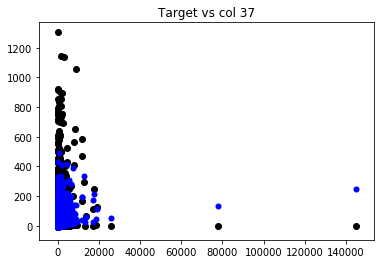

In [57]:
reg = sk.linear_model.LinearRegression()
reg.fit(selected_features,target)
print reg.score(selected_features,target).mean()
for col in [35,31,7,22,33,37]:
    # Plot outputs
    plt.title('Target vs col ' + `col`)
    plt.scatter(data[[col]], target,  color='black')
    plt.scatter(data[[col]], pred  ,  color='blue', linewidth=.03)

    plt.show()

Plotting coefficients

In [66]:
best_6_reg.intercept_

array([ 6.61008])

### Step 2 : Multiple regression

First we do a polynomial regression

In [58]:
mult_reg_all_var = sk.linear_model.LinearRegression()
f = features[[35,31,7,22,33,37]]
selected_features = np.concatenate(
                    [
                        f,
                        f*f,
                        f*f*f
                    ]
                    ,axis=1)
scores = sk.model_selection.cross_val_score(mult_reg_all_var,selected_features,target,cv = 100)
#print scores
print scores.mean()
print (np.sort(scores))[10:].mean()
scores_sorted = np.array(sorted(scores))
print scores_sorted
print sum(scores_sorted>.6)/(1.*len(scores_sorted))

mult_reg_all_var.fit(selected_features,target)
print mult_reg_all_var.score(selected_features,target)

-9.00427587357
0.295112357305
[-502.32413 -379.94576  -14.8737   -10.5998    -8.15097   -3.62379
   -3.37196   -2.46736   -0.85065   -0.77958   -0.74669   -0.71055
   -0.63773   -0.58127   -0.37812   -0.30234   -0.28149   -0.27667
   -0.26338   -0.06183   -0.05245    0.03039    0.08171    0.14044
    0.15333    0.18217    0.19505    0.20351    0.21192    0.21988
    0.22554    0.22696    0.23721    0.23924    0.24002    0.24545
    0.24754    0.25338    0.25825    0.26568    0.26779    0.27275
    0.29006    0.29196    0.30233    0.32662    0.33493    0.33738
    0.3424     0.34913    0.35585    0.35798    0.35864    0.37176
    0.37406    0.37826    0.38494    0.38549    0.38755    0.39569
    0.39718    0.40311    0.40509    0.40956    0.41137    0.41908
    0.42721    0.42738    0.42895    0.43171    0.43472    0.43643
    0.43936    0.44279    0.44935    0.45566    0.47303    0.49007
    0.4914     0.50206    0.50369    0.50561    0.50786    0.51462
    0.51476    0.52273    0.5228

On the model below, both polynomials of dim 2 and 3 perform similar: a few samples have very bad scores, while the general behaviour is of a much better performance than the linear one.

More than 3 is quite a overfitting...

In [59]:
poly = sk.preprocessing.PolynomialFeatures(2)

mult_reg_all_var = sk.linear_model.LinearRegression()


f = features[[35,31,7,22,33,37,34]]
selected_features = poly.fit_transform(f)

scores = sk.model_selection.cross_val_score(mult_reg_all_var,selected_features,target,cv = 5)
#print scores
print selected_features.shape
print scores.mean()
print (np.sort(scores))[10:].mean()
scores_sorted = np.array(sorted(scores))
print scores_sorted
print sum(scores_sorted>.6)/(1.*len(scores_sorted))

mult_reg_all_var.fit(selected_features,target)
print mult_reg_all_var.score(selected_features,target)

(40949, 36)
-5.87951666308
nan
[-31.18232   0.30386   0.42303   0.50607   0.55179]
0.0
0.494575507269


/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: Mean of empty slice.
/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


separar por variavel categorica

### Non linear Models

Trying strong regression algorithms:
- Elastic Net
- Random Forests

In [140]:
#Elastic Net
poly = sk.preprocessing.PolynomialFeatures(2)
f = features[[35,31,7,22,33,37,34,39]]
selected_features = poly.fit_transform(f)

reg = sk.linear_model.ElasticNet(alpha=1, l1_ratio=.5)
reg.fit(selected_features,target)
print reg.score(selected_features,target)

scores = sk.model_selection.cross_val_score(mult_reg_all_var,selected_features,target,cv = 10)
print scores
print scores.mean()


0.488825446373
[ 0.61113  0.4997   0.35518  0.42415  0.60022  0.36611 -0.40077 -1.72011
  0.35216  0.35775]
0.144550610106


In [68]:
###Random forest

#Feature processing
selected_features = np.concatenate(
                                    [
                                        numerical_features,
                                        data[[40,41]],
                                    ]
                                    ,axis=1)
#model
reg = sk.ensemble.RandomForestRegressor(n_estimators=200,n_jobs=-1,oob_score = True,random_state=42)

#R2
reg.fit(selected_features,target)
print reg.score(selected_features,target)

#Cross Validation
scores = sk.model_selection.cross_val_score(reg,selected_features,target,cv = 5)
print scores
print scores.mean()

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.951120105365
[ 0.69855  0.54683  0.68567  0.52567  0.51961]
0.595264210278


# Submission

In [86]:
#importing
test_data = pd.read_csv("P1TestingData.csv",header=None)

#preprocessing (converting weekdays to numbers)
test_data.loc[test_data.loc[:,40] == 'FRI',40] = 6
test_data.loc[test_data.loc[:,40] == 'THU',40] = 5
test_data.loc[test_data.loc[:,40] == 'WED',40] = 4
test_data.loc[test_data.loc[:,40] == 'TUE',40] = 3
test_data.loc[test_data.loc[:,40] == 'MON',40] = 2
test_data.loc[test_data.loc[:,40] == 'SUN',40] = 1
test_data.loc[test_data.loc[:,40] == 'SAT',40] = 7

test_data.loc[test_data.loc[:,41] == 'FRI',41] = 6
test_data.loc[test_data.loc[:,41] == 'THU',41] = 5
test_data.loc[test_data.loc[:,41] == 'WED',41] = 4
test_data.loc[test_data.loc[:,41] == 'TUE',41] = 3
test_data.loc[test_data.loc[:,41] == 'MON',41] = 2
test_data.loc[test_data.loc[:,41] == 'SUN',41] = 1
test_data.loc[test_data.loc[:,41] == 'SAT',41] = 7

test_selected_features = test_data[range(1,42)]
test_selected_features.head()

1    2       3   4     5       6           7      8           9   \
0  33326385  157   27408  47  61.0   341.0  137.428571  109.5   69.209531   
1    722396    0   17374  53  15.0   207.0   59.666667   31.0   67.269772   
2   3135552    0   33619  86   0.0    60.0   23.666667   11.0   26.081070   
3    971274    0  329530  20   0.0  2160.0  125.304569   13.0  369.449568   
4   4290409   11  131422   9   0.0   937.0  126.380952   64.0  167.505643   

    10 ...  32   33   34  35   36  37  38  39  40  41  
0  4.0 ...   0  101  101   3  215  99   0  24   7   7  
1  9.0 ...  45   48  -36  44  175  13   0  24   5   7  
2  0.0 ...   0   60   60  15  115  80   0  24   6   7  
3  0.0 ...   0    1    1   2  147   3   0   4   2   2  
4  0.0 ...   0   22   22   1  190  18   0  24   7   7  

[5 rows x 41 columns]

In [90]:
output = reg.predict(test_selected_features)

text_file = open("Output.txt", "w")

text_file.write('\n')

for item in output:
    text_file.write("%s\n" % item)
    
text_file.close()